Importing needed Packages

In [580]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go

Creating dataframes for each sheet by reading the excel file -'V02Max_Combined'

In [15]:
file_path='Hackathon_Aug24/V02Max_Combined.xlsx'
Kayaking=pd.read_excel(file_path,sheet_name='Kayaking')
Athletes=pd.read_excel(file_path,sheet_name='Athletes')
Traithlon=pd.read_excel(file_path,sheet_name='Triathlon')
Fencing=pd.read_excel(file_path,sheet_name='Fencing')


C:\Users\Sailu\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Sailu\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Sailu\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [18]:
print(Kayaking)

       ID      time     RR       VO2  power
0      11  -168.600  727.0  0.287147      0
1      11  -167.872  728.0  0.287147      0
2      11  -167.148  724.0  0.287147      0
3      11  -166.484  664.0  0.320580      0
4      11  -165.836  648.0  0.320580      0
...    ..       ...    ...       ...    ...
19473  16  1118.404  548.0  0.671957      0
19474  16  1118.944  540.0  0.671957      0
19475  16  1119.484  540.0  0.671957      0
19476  16  1120.016  532.0  0.671957      0
19477  16  1120.544  528.0  0.671957      0

[19478 rows x 5 columns]


Creating a column called 'Sport' into the dataframes

In [27]:
Kayaking['sport']='Kayaking'
Fencing['sport']='Fencing'
Traithlon['sport']='Triathlon'

Concatenating all the dataframes (all the sheets into one)

In [37]:
All_sports=pd.concat([Kayaking,Fencing,Traithlon],ignore_index=True)

In [39]:
All_sports.head()

,ID,time,RR,VO2,power,sport
0,11,-168.600,727.0,0.287147,0,Kayaking
1,11,-167.872,728.0,0.287147,0,Kayaking
2,11,-167.148,724.0,0.287147,0,Kayaking
3,11,-166.484,664.0,0.320580,0,Kayaking
4,11,-165.836,648.0,0.320580,0,Kayaking


In [41]:
All_sports.tail()

,ID,time,RR,VO2,power,sport
52057,18,947.288,536.0,0.507071,0,Triathlon
52058,18,947.816,528.0,0.507071,0,Triathlon
52059,18,948.344,528.0,0.507071,0,Triathlon
52060,18,948.884,540.0,0.507071,0,Triathlon
52061,18,949.424,540.0,0.507071,0,Triathlon


In [53]:
All_sports.set_index(['sport'],inplace=True)

In [126]:
All_sports.head()

,ID,time,RR,VO2,power
sport,,,,,
Kayaking,11,-168.600,727.0,0.287147,0
Kayaking,11,-167.872,728.0,0.287147,0
Kayaking,11,-167.148,724.0,0.287147,0
Kayaking,11,-166.484,664.0,0.320580,0
Kayaking,11,-165.836,648.0,0.320580,0


Q17 ) What is the maximum ventilatory threshold for triathletes.

In [113]:
#Athletes.describe()
Triathletes=Athletes[(Athletes['sport']=='triathlon')]
Triathletes


,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name
16,17,12,39.9,156,101,145,triathlon,Male,Latino,Lucas,Foster
17,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers


In [188]:
Max_Ventilatory_threshold=Triathletes[['P_vt1','P_vt2']].describe()
Max_Ventilatory_threshold.loc['max']

P_vt1    101.0
P_vt2    168.0
Name: max, dtype: float64

In [216]:
Triathletes.groupby('ID')['P_vt1'].max() 
Triathletes.groupby('ID')['P_vt2'].max()

ID
17    145
18    168
Name: P_vt2, dtype: int64

Q18)Display the number of athletes in every sport against the name of the sport.

In [147]:
Athletes['sport'].value_counts()

sport
fencing      10
kayak         6
triathlon     2
Name: count, dtype: int64

Q22)Using any 10 HR values print even if the value is an even number and odd if its an odd number

In [200]:
All_sports['HR']=round(60000/All_sports['RR'])
HR_random=All_sports['HR'].tail(50)
HR_random=HR_random.drop_duplicates()
HR_random=HR_random.head(10)
for i in HR_random:
    if i%2==0:
        print(i," - even ")
    else:
        print(i," - odd ")


110.0  - even 
109.0  - odd 
115.0  - odd 
112.0  - even 
114.0  - even 
116.0  - even 
118.0  - even 
117.0  - odd 
111.0  - odd 
119.0  - odd 


Q24)Store athlete name and sport in a dictionary as a pair of values.

In [197]:
Name_sport_dict=Athletes.set_index('First Name')['sport'].to_dict()
Name_sport_dict

{'Olivia': 'fencing',
 'Ethan': 'fencing',
 'Jackson': 'fencing',
 'Liam': 'fencing',
 'Ava': 'fencing',
 'Sophia': 'fencing',
 'Grace': 'fencing',
 'Aiden': 'fencing',
 'Chloe': 'fencing',
 'Lily': 'fencing',
 'Isabella': 'kayak',
 'Caleb': 'kayak',
 'Mia': 'kayak',
 'Harper': 'kayak',
 'Mason': 'kayak',
 'Logan': 'kayak',
 'Lucas': 'triathlon',
 'Owen': 'triathlon'}

Q25) Using arrays and loops, find the count of athletes based on gender.

In [481]:
athletes_male=[]
athletes_female=[]

for fname,gender in zip(Athletes['First Name'],Athletes['Gender']):
    #print(FName,gender)
    if gender == 'Male':
        athletes_male.append(fname)      
    else:
        athletes_female.append(fname)
        
print('Male: ',len(athletes_male))
print('Female: ',len(athletes_female))



Male:  8
Female:  10


Q31)Return the count of athletes for any sport that the user inputs.

In [313]:
sport_in=input("Enter any sport from the following - fencing/triathlon/kayak")
df=dict(Athletes['sport'].value_counts())
for i in df:
        if i ==sport_in:
            print(df[sport_in])
        else:
            continue

Enter any sport from the following - fencing/triathlon/kayak triathlon


2


Q28) Print athlete 15s Age and Pvt1 using the format() function

In [578]:
df=Athletes[(Athletes['ID'] == 15)]
df_dict=df.to_dict('list')
athlete_details="Athlete ID is {ID}, His age is {age} and his P_vt1 is {pvt1}".format(ID=str(df_dict['ID']),age=df_dict['age'],pvt1=df_dict['P_vt1'])
print(athlete_details)


Athlete ID is [15], His age is [13] and his P_vt1 is [125]


Q32)Insert the name of every athlete into an array and display the length of that array.

In [495]:
arr=[]
for i in Athletes['First Name']:
    arr.append(i)
print(len(arr))

18


Q21) Display a pie chart of number of athletes by sport.

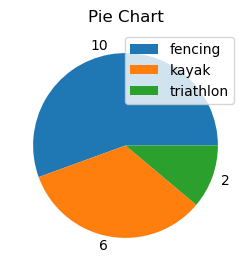

In [538]:
df=dict(Athletes['sport'].value_counts())

sport=[]
No_of_athletes=[]

for key in df.keys():
    sport.append(key)
    No_of_athletes.append(df[key])

plt.figure(figsize=(len(sport),len(No_of_athletes)) ) # if we don't use it, default size of the figure will be shown.
plt.title( 'Pie Chart')
plt.pie(No_of_athletes,labels = No_of_athletes )
plt.legend(labels = sport )


Q19) Display a bar chart showing the average V02 Max by sport.

<BarContainer object of 3 artists>

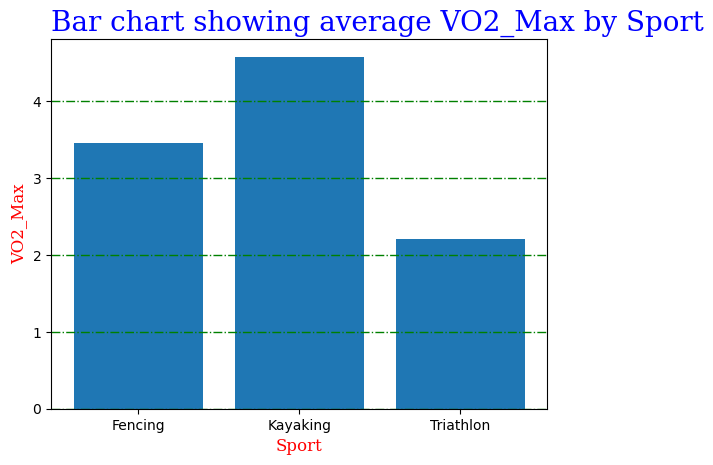

In [588]:
#All_sports.info()
df=All_sports.groupby('sport')['VO2'].max()
sport=[]
vo2_max=[]

for key in df.keys():
    sport.append(key)
    vo2_max.append(df[key])


font1 = {'family':'serif', 'color':'blue', 'size':20}
font2 = { 'family':'serif', 'color':'red', 'size':12}

plt.xlabel("Sport", fontdict = font2, loc = "center")
plt.ylabel("VO2_Max", fontdict = font2, loc='center') # top, center, bottom
plt.title("Bar chart showing average VO2_Max by Sport", fontdict = font1, loc = 'left')

plt. grid(axis = 'y',color ='g', linestyle = 'dashdot', linewidth=1) # dashed, solid, dottedd, dashdot, '-' ':', 'None', " ", '','-.'
plt.bar(sport,vo2_max)